# [Compiling xxz #34](https://github.com/qiboteam/boostvqe/pull/34)

Following Vatan and Williams https://arxiv.org/pdf/quant-ph/0308006

the 2 qubit Heisenberg gate defined in their notation as $N$

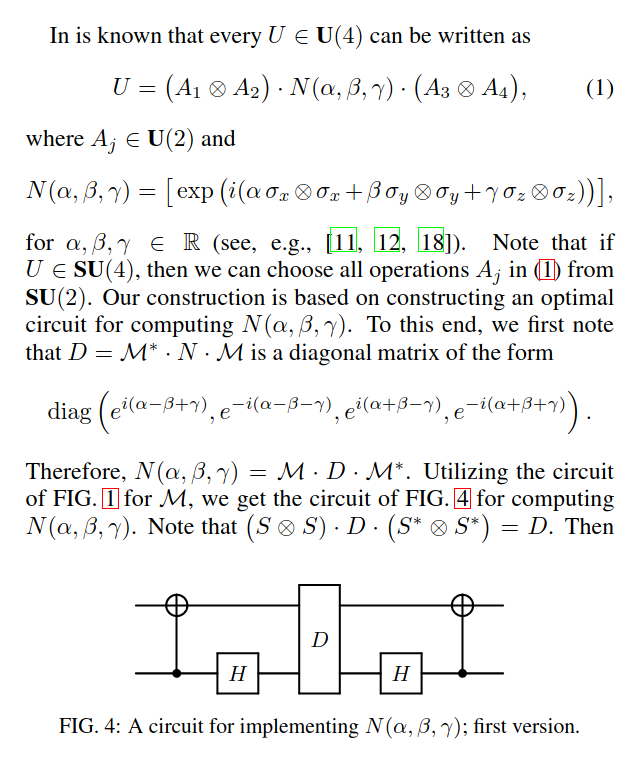

can be implemented with the circuit

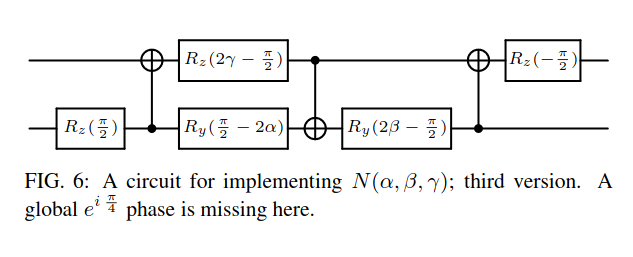



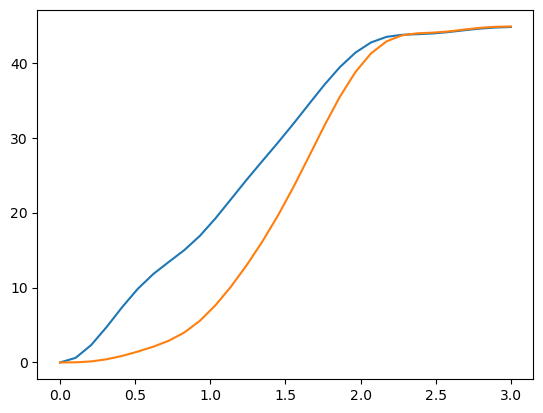

In [9]:

from qibo import hamiltonians
import numpy as np
from boostvqe.compiling_XXZ import *

t = 0.01
steps = 3
delta=0.5
nqubits= 10

h_xxz = hamiltonians.XXZ(nqubits=nqubits, delta = delta)

diff_norms = []
diff_norms_2nd_order = []
times = np.linspace(0,3,30)
for t in times:
    u = h_xxz.exp(t)
    circ = nqubit_XXZ_decomposition(nqubits=nqubits,t=t,delta=delta,steps=steps)
    diff_norms.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps)*circ.unitary()))
    circ = nqubit_XXZ_decomposition(nqubits=nqubits,t=t,delta=delta,steps=steps,order=2)
    diff_norms_2nd_order.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps, order = 2)*circ.unitary()))

import matplotlib.pyplot as plt

plt.plot(times, diff_norms)
plt.plot(times, diff_norms_2nd_order)



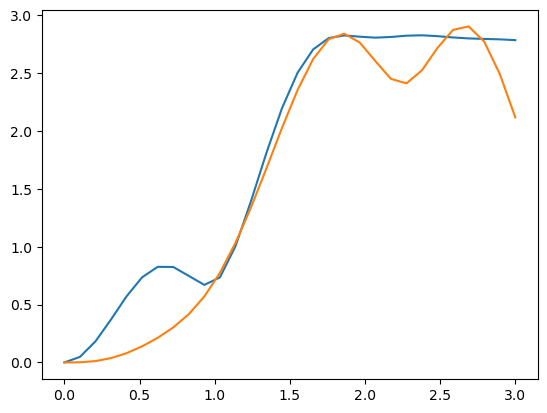

In [11]:

from qibo import hamiltonians
import numpy as np
from boostvqe.compiling_XXZ import *

t = 0.01
steps = 3
delta=0.5
nqubits= 4
from boostvqe.models.dbi.double_bracket_evolution_oracles import *
h_xxz = hamiltonians.XXZ(nqubits=nqubits, delta = delta)
h_xxz.delta = 0.5
eo_xxz = XXZ_EvolutionOracle(h_xxz,mode_evolution_oracle=EvolutionOracleType.numerical)
eo_xxz.mode_evolution_oracle=EvolutionOracleType.hamiltonian_simulation

eo_xxz.please_use_prescribed_nmb_ts_steps = 1
diff_norms = []
diff_norms_2nd_order = []
times = np.linspace(0,3,30)
a = lambda t_duration: nqubit_XXZ_decomposition(
            nqubits=nqubits,t=t_duration,delta=h_xxz.delta,steps=3,order=1)
b = lambda t_duration: nqubit_XXZ_decomposition(
            nqubits=nqubits,t=t_duration,delta=h_xxz.delta,steps=3,order=2)
for t in times:
    u = h_xxz.exp(t)
    circ = a(t)
    diff_norms.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps)*circ.unitary()))
    circ = b(t)
    diff_norms_2nd_order.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps, order = 2)*circ.unitary()))

import matplotlib.pyplot as plt

plt.plot(times, diff_norms)
plt.plot(times, diff_norms_2nd_order)

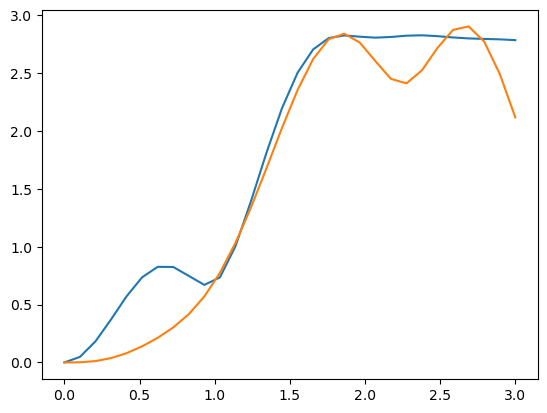

In [2]:

from qibo import hamiltonians
import numpy as np
from boostvqe.compiling_XXZ import *

t = 0.01
steps = 3
delta=0.5
nqubits= 4
from boostvqe.models.dbi.double_bracket_evolution_oracles import *
h_xxz = hamiltonians.XXZ(nqubits=nqubits, delta = delta)
h_xxz.delta = 0.5
eo_xxz = XXZ_EvolutionOracle(deepcopy(h_xxz),mode_evolution_oracle=EvolutionOracleType.numerical)
eo_xxz.mode_evolution_oracle=EvolutionOracleType.hamiltonian_simulation

eo_xxz.please_use_prescribed_nmb_ts_steps = 1
diff_norms = []
diff_norms_2nd_order = []
times = np.linspace(0,3,30)
a = lambda t_duration: nqubit_XXZ_decomposition(
            nqubits=nqubits,t=t_duration,delta=h_xxz.delta,steps=3,order=1)
b = lambda t_duration: nqubit_XXZ_decomposition(
            nqubits=nqubits,t=t_duration,delta=h_xxz.delta,steps=3,order=2)
for t in times:
    u = h_xxz.exp(t)
    circ = a(t)
    diff_norms.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps)*circ.unitary()))
    circ = eo_xxz.circuit(t,steps = 3, order =2)
    diff_norms_2nd_order.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps, order = 2)*circ.unitary()))

import matplotlib.pyplot as plt

plt.plot(times, diff_norms)
plt.plot(times, diff_norms_2nd_order)

In [18]:
eo_xxz.h.circuit(1)